In [1]:
import numpy as np
from matplotlib import pyplot as plt
from EM_learning import * 
%matplotlib inline

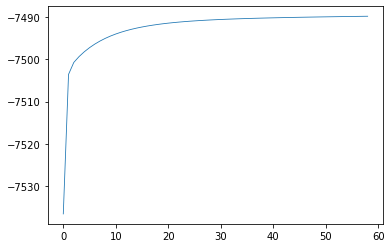

In [2]:
"""set generating parameter initilization """
## Load data 
X = np.loadtxt('ssm_spins.txt')
## Set initializing parameters
A0 = 0.99 * np.array([[np.cos(2 * np.pi / 180), - np.sin(2 * np.pi/180), 0, 0],
                      [np.sin(2 * np.pi / 180), np.cos(2 * np.pi / 180),0,0],
                      [0,0,np.cos(2 * np.pi / 90), - np.sin(2 * np.pi / 90)],
                      [0,0,np.sin(2 * np.pi / 90), np.cos(2 * np.pi / 90)]])
Q0 = np.identity(A0.dot(A0.T).shape[0]) - A0.dot(A0.T)
C0 = np.array([[1,0,1,0],[0,1,0,1],[1,0,0,1],[0,0,1,1],[0.5,0.5,0.5,0.5]])
R0 = np.identity(C0.shape[0])

## set maximum interation 
max_iter = 60
## Store Log Likelihood 
loglike_generating_para = EM_LGSSM(X, A0, Q0, C0, R0, max_iter)
## Plot Log Likelihood 
plt.plot(loglike_generating_para, linewidth=0.8)
plt.show() 

In [3]:
loglike_generating_para = EM_LGSSM(X, A0, Q0, C0, R0, max_iter)

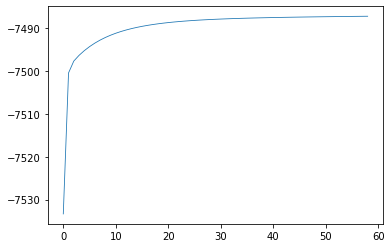

In [4]:
plt.plot(loglike_generating_para, linewidth=0.8)
plt.show() 

In [5]:
from scipy.stats import ortho_group # generate orthogonal matrix 

def generate_psd_matrix(n=4):
    ## generate positive definite matrix using SVD
    W = ortho_group.rvs(dim=n)
    D = np.diag(np.abs(np.random.randn(n)))
    psd_mtx = W.dot(D).dot(W.T)
    return psd_mtx 

In [6]:
loglike_r = []
for i in range(20):
    
    """set random initilization """
    ## Load data 
    ## Set initializing parameters
    ## For stability, A must be psd, C be uniform
    ## Q and R be uniform on diag 
    A0_rand = generate_psd_matrix(n=4)
    C0_rand = np.random.rand(5,4)
    Q0_rand = np.diag(np.random.rand(4)) 
    R0_rand = np.diag(np.random.rand(5))

    ## set maximum interation 
    max_iter = 60

    loglike_rand = EM_LGSSM(X, A0_rand, Q0_rand, C0_rand, R0_rand, max_iter)
    loglike_r.append(loglike_rand)

In [7]:
index = [0,1,2,3,5,8,13,15,19]
L = np.array(loglike_r)
L = L[index]

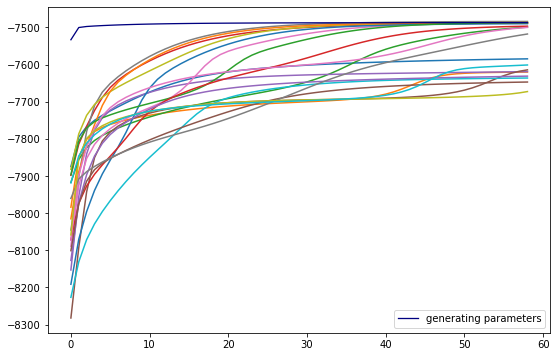

In [8]:
L = np.array(loglike_r)
plt.figure(figsize=(9,6))
plt.plot(L.T)
plt.plot(loglike_generating_para, linewidth=1.3, color = 'navy', label = 'generating parameters')
plt.legend(loc = 'best')
plt.show()

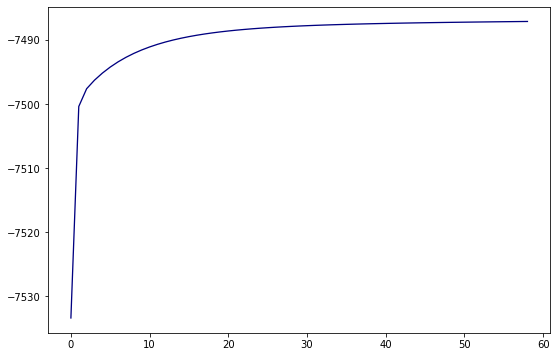

In [9]:
plt.figure(figsize=(9,6))
plt.plot(loglike_generating_para, linewidth=1.3, color = 'navy')
plt.show()